In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_without_outlier = pd.read_csv('./new_df5.csv')
print(data_without_outlier)

       State_Name District_Name  Crop_Year       Season       Crop      Area  \
0     Maharashtra    AHMEDNAGAR       1997  Kharif            Gram   40800.0   
1     Maharashtra    AHMEDNAGAR       1997  Kharif       Sugarcane   45900.0   
2     Maharashtra    AHMEDNAGAR       1997  Rabi             Wheat   79700.0   
3     Maharashtra    AHMEDNAGAR       1998  Kharif       Sugarcane   59600.0   
4     Maharashtra    AHMEDNAGAR       1998  Rabi              Gram   59600.0   
...           ...           ...        ...          ...        ...       ...   
1952  Maharashtra      YAVATMAL       2013  Kharif       Arhar/Tur  109200.0   
1953  Maharashtra      YAVATMAL       2013  Kharif           Jowar   48300.0   
1954  Maharashtra      YAVATMAL       2013  Rabi              Gram   45600.0   
1955  Maharashtra      YAVATMAL       2014  Kharif       Arhar/Tur  111800.0   
1956  Maharashtra      YAVATMAL       2014  Kharif           Jowar   43100.0   

      Production  
0        18600.0  
1

In [3]:
from sklearn.preprocessing import LabelEncoder

# Assuming data_without_outlier is your DataFrame

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for column in data_without_outlier.columns:
    # Check if the column datatype is object (i.e., string)
    if data_without_outlier[column].dtype == 'object':
        # Use LabelEncoder to convert the string values into numeric data
        data_without_outlier[column] = label_encoder.fit_transform(data_without_outlier[column])

print(data_without_outlier.head())

   State_Name  District_Name  Crop_Year  Season  Crop     Area  Production
0           0              0       1997       0     3  40800.0     18600.0
1           0              0       1997       0    16  45900.0     38940.0
2           0              0       1997       1    19  79700.0     87100.0
3           0              0       1998       0    16  59600.0   5231800.0
4           0              0       1998       1     3  59600.0     40900.0


In [7]:
data_copy = data_without_outlier

mean_area = data_copy['Area'].mean()
std_area = data_copy['Area'].std()

data_copy['Area_normalized'] = (data_copy['Area'] - mean_area) / std_area

print(data_copy[['Area', 'Area_normalized']].head())

      Area  Area_normalized
0  40800.0        -1.041486
1  45900.0        -0.936164
2  79700.0        -0.238149
3  59600.0        -0.653241
4  59600.0        -0.653241


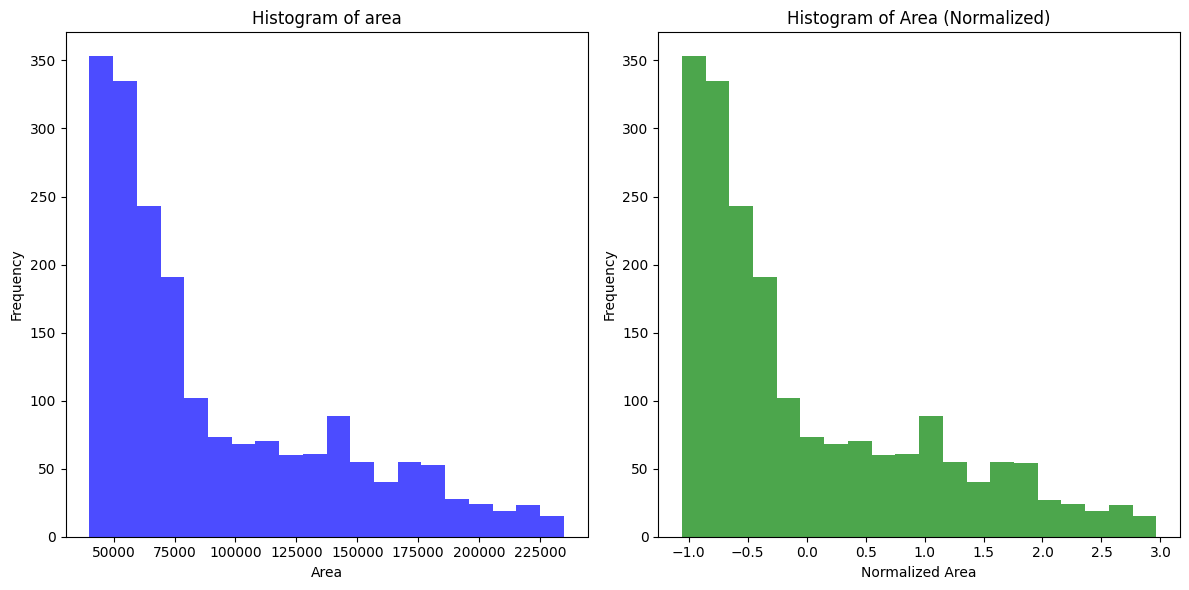

In [9]:
import matplotlib.pyplot as plt

# Plot histograms of the original 'production' attribute and the normalized 'Poduction_normalized' attribute
plt.figure(figsize=(12, 6))

# Plot histogram of the original 'Area' attribute
plt.subplot(1, 2, 1)
plt.hist(data_copy['Area'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of area')
plt.xlabel('Area')
plt.ylabel('Frequency')

# Plot histogram of the normalized 'Area_normalized' attribute
plt.subplot(1, 2, 2)
plt.hist(data_copy['Area_normalized'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Area (Normalized)')
plt.xlabel('Normalized Area')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()